**Mughees Ur Rehman(24100086),Muhammad Saad,Muhammad Ali Raza(24100298)**

**CS 678 Topics in Internet Research**

**Redis Benchmarking**


In [1]:
!pip3 install redis
!pip3 install redis-migrate
!pip3 install redis --upgrade


     |████████████████████████████████| 238 kB 324 kB/s eta 0:00:01
     |████████████████████████████████| 64 kB 642 kB/s eta 0:00:011
     |████████████████████████████████| 71 kB 835 kB/s eta 0:00:01
     |████████████████████████████████| 43 kB 622 kB/s eta 0:00:01
  Attempting uninstall: redis
    Found existing installation: redis 4.5.3
    Uninstalling redis-4.5.3:
      Successfully uninstalled redis-4.5.3
  Using cached redis-4.5.3-py3-none-any.whl (238 kB)
ERROR: redis-migrate 1.0.0 has requirement redis==2.10.6, but you'll have redis 4.5.3 which is incompatible.
  Attempting uninstall: redis
    Found existing installation: redis 2.10.6
    Uninstalling redis-2.10.6:
      Successfully uninstalled redis-2.10.6


In [1]:
import redis
import time
import matplotlib.pyplot as plt
import numpy as np


`` MIGRATING Benchmarking (Local-Local Machine) ``

In [2]:
def generateKeyValues(numbers):
    ls = dict()
    for i in range(numbers):
        ls[i] = i
    return ls

def benchMarkMigrate(src_redis,dst_redis,start,increment,end,averageFactor,loop):
    kvTime = []
    ls = np.arange(start,end+1,increment, dtype=int)
    dst_port = dst_redis.connection_pool.connection_kwargs['port']
    kv_list = [generateKeyValues(numOfKeys) for numOfKeys in ls]
    for setKV in kv_list:
        src_redis.mset(setKV)
        tempTime = []
        for j in range(averageFactor):
            beforeMigration = time.time()
            if loop == True:
                for key in setKV.keys():
                    src_redis.migrate(host='localhost', port=6380,keys=key,destination_db=0,copy=True,replace=True,timeout=200)
            else:
                src_redis.migrate(host='localhost', port=dst_port,keys=setKV.keys(),destination_db=0,copy=True,replace=True,timeout=200)
            timeLapsed = time.time()-beforeMigration
            tempTime.append(timeLapsed)
        kvTime.append(np.average(np.array(tempTime)))
    return (ls,kvTime)

def plotLineGraph(x,y):
    plt.rcParams["figure.figsize"] = (10,8)
    plt.plot(np.array(x),np.array(y) ,'-go')
    plt.xlabel('Number of Keys',fontsize=10)
    plt.xlim(0, x[len(x)-1]+200)
    plt.ylabel('Time/ms',fontsize=10)
    plt.title('MIGRATE API -Benchmarking',fontsize=15)
    plt.show()
    
def plotBarGraph(x,y):
    plt.rcParams["figure.figsize"] = (10,8)
    plt.bar(np.array(x),np.array(y) , color ='maroon',
            width = 3500)
    plt.xlabel('Number of Keys',fontsize=10)
    plt.xlim(0, x[len(x)-1]+200)
    plt.ylabel('Time/ms',fontsize=10)
    plt.title('MIGRATE API -Benchmarking',fontsize=15)
    plt.show()
    

``` Migrating Multiple-Keys together ```

In [3]:
#Running one Redis Instance on port 6379 and other on 6380
src_redis = redis.Redis(host='localhost', port=6379, db=0)
dst_redis = redis.Redis(host='localhost', port=6380, db=0)

START = 20000
INCREMENT_FACTOR = 10000
END = 500000
AVERAGEFACTOR = 10
USE_ONE_KEY_AT_A_TIME = False

(numOfKeys,timeKeys) =  benchMarkMigrate(src_redis,dst_redis,START,INCREMENT_FACTOR,END,AVERAGEFACTOR,USE_ONE_KEY_AT_A_TIME )

```` Line Graph ````


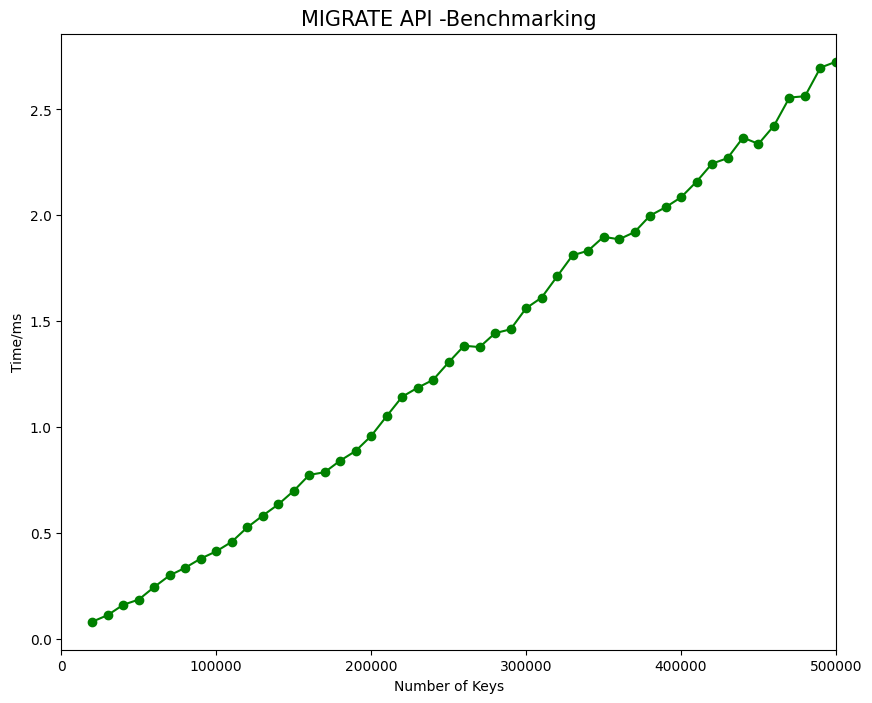

In [25]:
plotLineGraph(numOfKeys,timeKeys)

``` Plot Barplot ```

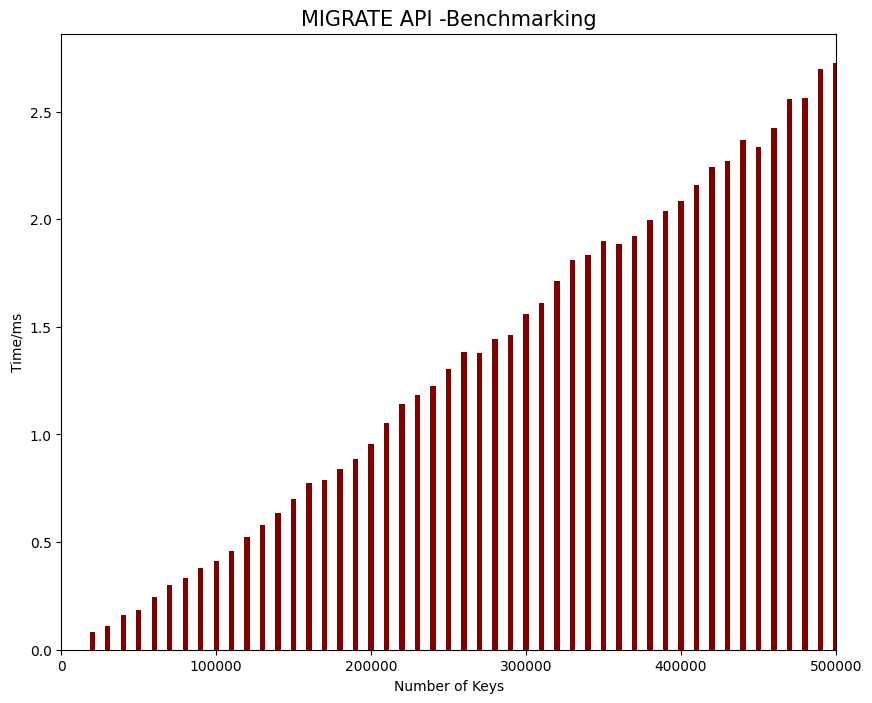

In [30]:
plotBarGraph(numOfKeys,timeKeys)

``` Migrating one key at a time```

In [8]:
src_redis = redis.Redis(host='localhost', port=6379, db=0)
dst_redis = redis.Redis(host='localhost', port=6380, db=0)

START = 20000
INCREMENT_FACTOR = 10000
END = 200000
AVERAGEFACTOR = 2
USE_ONE_KEY_AT_A_TIME = True

(numOfKeys,timeKeys) =  benchMarkMigrate(src_redis,dst_redis,START,INCREMENT_FACTOR,END,AVERAGEFACTOR,USE_ONE_KEY_AT_A_TIME )

``` Plot Line Graph ```

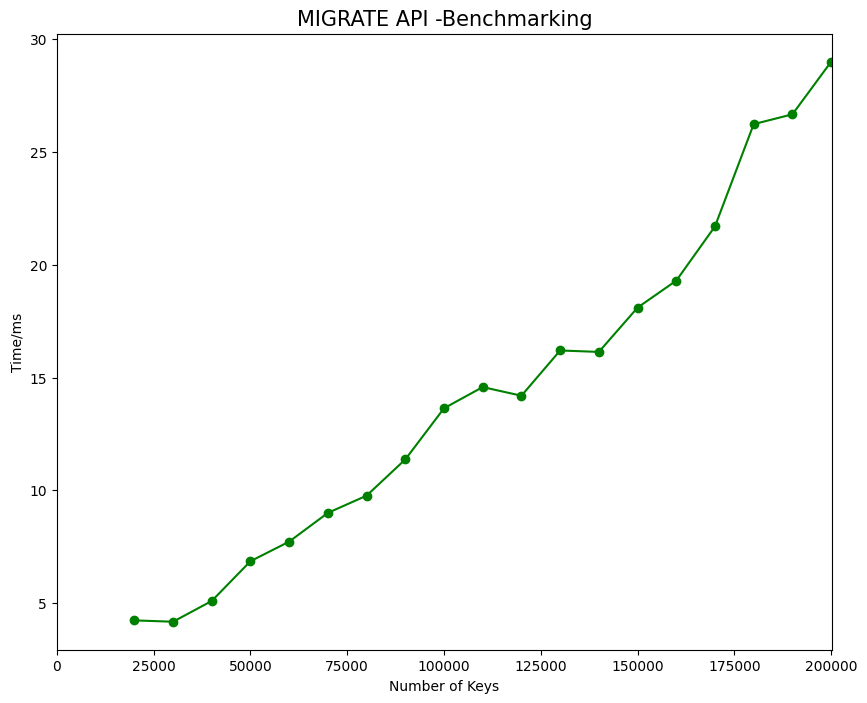

In [12]:

plotLineGraph(numOfKeys,timeKeys)

``` Plot Bar Graph ```


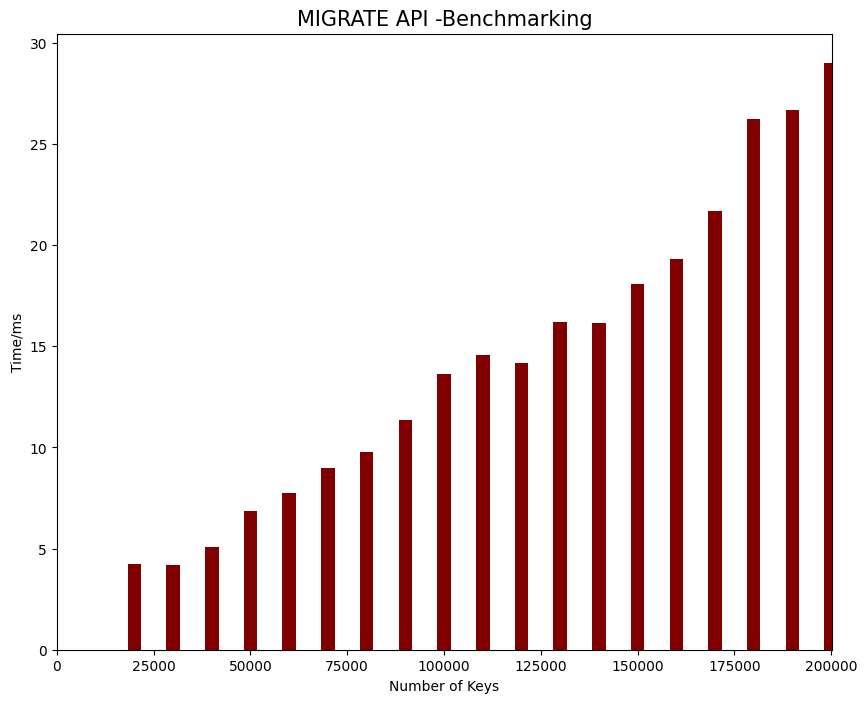

In [13]:
plotBarGraph(numOfKeys,timeKeys)